In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io

## Question 60 4-連結数

connect_sample.png を4-連結数により、色分けせよ。

4-連結数とは近傍との画素の状態を見る値である。 通常、近傍は注目画素x0(x,y)が0でない場合に対して、次のように定義される。

* x4(x-1,y-1) x3(x,y-1) x2(x+1,y-1)
* x5(x-1,y) x0(x,y) x1(x+1,y)
* x6(x-1,y+1) x7(x,y+1) x8(x+1,y+1)
ここで4連結数とは、次式で計算される。

* S = (x1 - x1 x2 x3) + (x3 - x3 x4 x5) + (x5 - x5 x6 x7) + (x7 - x7 x8 x1)

S = [0,4]の範囲をとり、

* S = 0 は内部点
* S = 1 は端点
* S = 2 は連結点
* S = 3 は分岐点
* S = 4 は交差点 を示す。

In [10]:
def connect_4(img):
    h, w = img.shape
    
    tmp = np.zeros((h, w), dtype=int)
    
    tmp[img > 0] = 1
    
    out = np.zeros((h, w, 3), dtype=np.uint8)
    
    for y in range(h):
        for x in range(w):
            if tmp[y, x] == 0:
                continue
            
            x1 = tmp[y, min(x+1, w-1)]
            x2 = tmp[max(y-1, 0), min(x+1, w-1)]
            x3 = tmp[max(y-1, 0), x]
            x4 = tmp[max(y-1, 0), max(x-1, 0)]
            x5 = tmp[y, max(x-1, 0)]
            x6 = tmp[min(y+1, h-1), max(x-1, 0)]
            x7 = tmp[min(y+1, h-1), x]
            x8 = tmp[min(y+1, h-1), min(x+1, w-1)]
            
            S = (x1 - x1 * x2 * x3) + (x3 - x3 * x4 * x5) + (x5 - x5 * x6 * x7) + (x7 - x7 * x8 * x1)
            
            if S == 0:
                out[y, x] = [255, 0, 0]
            elif S == 1:
                out[y, x] = [0, 255, 0]
            elif S == 2:
                out[y, x] = [0, 0, 255]
            elif S == 3:
                out[y, x] = [255, 255, 0]
            elif S == 4:
                out[y, x] = [255, 0, 255]
            
    out = out.astype(np.uint8)
    return out

In [6]:
img_connect = io.imread("https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/images/connect_sample.png?raw=true")

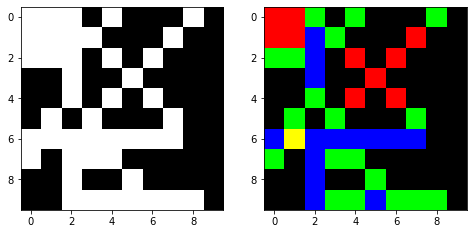

In [11]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_connect, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(connect_4(img_connect))

## Question 62 8-連結数

connect_sample.pngを8-連結数により、色分けせよ。

8連結数とは

S = (x1 - x1 x2 x3) + (x3 - x3 x4 x5) + (x5 - x5 x6 x7) + (x7 - x7 x8 x1)

において各xの値の0と1を反転させた値を用いる。

In [12]:
def connect_8(img):
    h, w = img.shape
    
    tmp = np.zeros((h, w), dtype=int)
    tmp[img > 0] = 1
    tmp = 1 - tmp
    
    out = np.zeros((h, w, 3), dtype=np.uint8)
    
    for y in range(h):
        for x in range(w):
            if tmp[y, x] == 1:
                continue
            
            x1 = tmp[y, min(x+1, w-1)]
            x2 = tmp[max(y-1, 0), min(x+1, w-1)]
            x3 = tmp[max(y-1, 0), x]
            x4 = tmp[max(y-1, 0), max(x-1, 0)]
            x5 = tmp[y, max(x-1, 0)]
            x6 = tmp[min(y+1, h-1), max(x-1, 0)]
            x7 = tmp[min(y+1, h-1), x]
            x8 = tmp[min(y+1, h-1), min(x+1, w-1)]
            
            S = (x1 - x1 * x2 * x3) + (x3 - x3 * x4 * x5) + (x5 - x5 * x6 * x7) + (x7 - x7 * x8 * x1)
            
            if S == 0:
                out[y, x] = [255, 0, 0]
            elif S == 1:
                out[y, x] = [0, 255, 0]
            elif S == 2:
                out[y, x] = [0, 0, 255]
            elif S == 3:
                out[y, x] = [255, 255, 0]
            elif S == 4:
                out[y, x] = [255, 0, 255]
            
    out = out.astype(np.uint8)
    return out

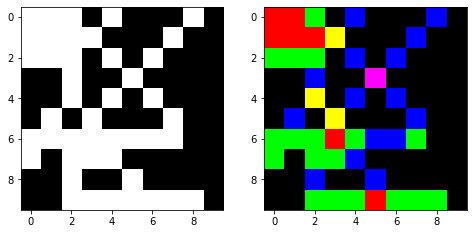

In [14]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_connect, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(connect_8(img_connect))

## Question 63 細線化処理

gazo_sample.png を細線化せよ。

細線化とは画素の幅を1にする処理であり、ここでは次のアルゴリズムに沿って処理を行え。

左上からラスタスキャンする。 x0(x,y)=0ならば、処理なし。x0(x,y)=1ならば次の3条件を満たす時にx0=0に変える。

* 注目画素の4近傍に0が一つ以上存在する
* x0の4-連結数が1である
* x0の8近傍に1が3つ以上存在する

1回のラスタスキャンで2の変更数が0になるまで、ラスタスキャンを繰り返す。

細線化にはヒルディッチのアルゴリズム(Q.64)や、Zhang-Suenのアルゴリズム(Q.65)、田村のアルゴリズムなどが存在する。

In [ ]:
def thinning(img):
    h, w = img.shape
    
    out = np.zeros((h, w), dtype=int)
    out[img > 0] = 1
    
    for y in range(h):
        for x in range(w):
            if out[y, x] == 0:
                continue
                
            
            
    